In [1]:
#Examples from https://www.hdfeos.org/zoo/index_openOBPG_Examples.php#MODIST

#Download swath data
data_grid = "https://gamma.hdfgroup.org/ftp/pub/outgoing/NASAHDF/T2010001000000.L2_LAC_SST.nc"
    
#Download grid data
#https://gamma.hdfgroup.org/ftp/pub/outgoing/NASAHDF/T20000322000060.L3m_MO_NSST_sst_4km.nc
    
import urllib.request
urllib.request.urlretrieve(data_grid, "../data/demo.nc")

('../data/demo.nc', <http.client.HTTPMessage at 0x7f95c8145340>)

In [ ]:
# Install these two extra packages into the "geopy" environment
!pip install basemap
!pip install netCDF4

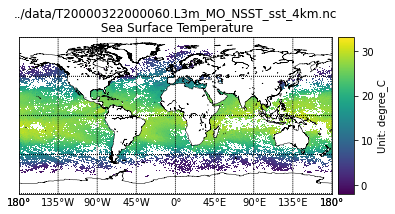

In [3]:
"""

This example code illustrates how to access and visualize a OBPG MODIS Terra
 Grid netCDF-4 file in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage: save this script and run

    $python T20000322000060.L3m_MO_NSST_sst_4km.nc.py

Tested under: Python 3.7.3 :: Anaconda custom (x86_64)
Last Update: 2019-12-12
"""

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

# Open netCDF-4 file.
FILE_NAME = '../data/T20000322000060.L3m_MO_NSST_sst_4km.nc'
nc = Dataset(FILE_NAME)

# Read dataset.
DATAFIELD_NAME='sst'
dset = nc.variables[DATAFIELD_NAME]
data = dset[:]
latitude = nc.variables['lat'][:]
longitude = nc.variables['lon'][:]

# Dataset is too big for plotting.
# Subset every n-th point to visualize data.
n = 2
data = data[::n, ::n]
latitude = latitude[::n]
longitude = longitude[::n]

m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
m.pcolormesh(longitude, latitude, data, latlon=True)
cb = m.colorbar()
dset = nc.variables[DATAFIELD_NAME]
units = dset.units
cb.set_label('Unit: '+units)
long_name = dset.long_name
plt.title('{0}\n {1}'.format(FILE_NAME, long_name))
fig = plt.gcf()

# Save plot.
pngfile = "{0}.py.png".format(FILE_NAME)
fig.savefig(pngfile)

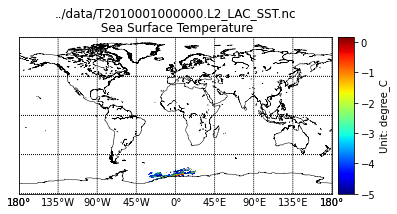

In [7]:
"""

This example code illustrates how to access and visualize a OBPG TERRA MODIS
 Swath netCDF-4 file in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage:  save this script and run

    $python T2010001000000.L2_LAC_SST.nc.py

Tested under: Python 3.7.3 :: Anaconda custom (x86_64)
Last Update: 2019-12-11
"""

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

# Open netCDF-4 file.
FILE_NAME = '../data/T2010001000000.L2_LAC_SST.nc'
nc = Dataset(FILE_NAME)

# Read dataset.
DATAFIELD_NAME='sst'
g = nc.groups['geophysical_data']
data = g.variables[DATAFIELD_NAME][:]
n = nc.groups['navigation_data']
latitude = n.variables['latitude'][:]
longitude = n.variables['longitude'][:]
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
m.scatter(longitude, latitude, c=data, s=0.05, cmap=plt.cm.jet,
           edgecolors=None, linewidth=0)
cb = m.colorbar()
dset = g.variables[DATAFIELD_NAME]
units = dset.units
cb.set_label('Unit: '+units)
long_name = dset.long_name
plt.title('{0}\n {1}'.format(FILE_NAME, long_name))
fig = plt.gcf()

# Save plot.
pngfile = "{0}.py.png".format(FILE_NAME)
fig.savefig(pngfile)
